# UTS Data Mining - Regresi Linear

Nama: Rizky Baruna

NPM: 2310631170115

Kelas: 5A Informatika

## **Data Profiling (Real Estate Prediction)**

## **EDA (Exploratory Data Analysis)**

In [45]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [46]:
# Load dataset dari URL
!wget https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv

# Baca file csv ke dalam DataFrame
df = pd.read_csv('used_cars_price_fiks.csv')
df

--2025-10-07 13:27:10--  https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602640 (589K) [text/plain]
Saving to: ‘used_cars_price_fiks.csv.5’

used_cars_price_fik 100%[===================>] 588.52K  --.-KB/s    in 0.06s   

2025-10-07 13:27:10 (9.71 MB/s) - ‘used_cars_price_fiks.csv.5’ saved [602640/602640]



,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [47]:
# Menampilkan informasi ringkas dataset
print("Informasi Dataset:")
df.info()

print("\nStatistika Deskriptif:")
# Menampilkan nilai statistika deskriptif
df.describe().T

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB

Statistika Deskriptif:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6019.0,3009.000000,1737.679967,0.00,1504.50,3009.00,4513.50,6018.00
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,5719.0,57545.592586,37988.496154,171.00,33923.00,53000.00,72998.00,775000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


Fungsi ini digunakan untuk memeriksa data secara awal. df.info() menampilkan ringkasan struktur data, seperti jenis data di setiap kolom dan jumlah nilai yang tidak kosong. df.describe().T memberikan statistik deskriptif untuk kolom-kolom yang berisi angka.

Visualisasi Distribusi Fitur: 


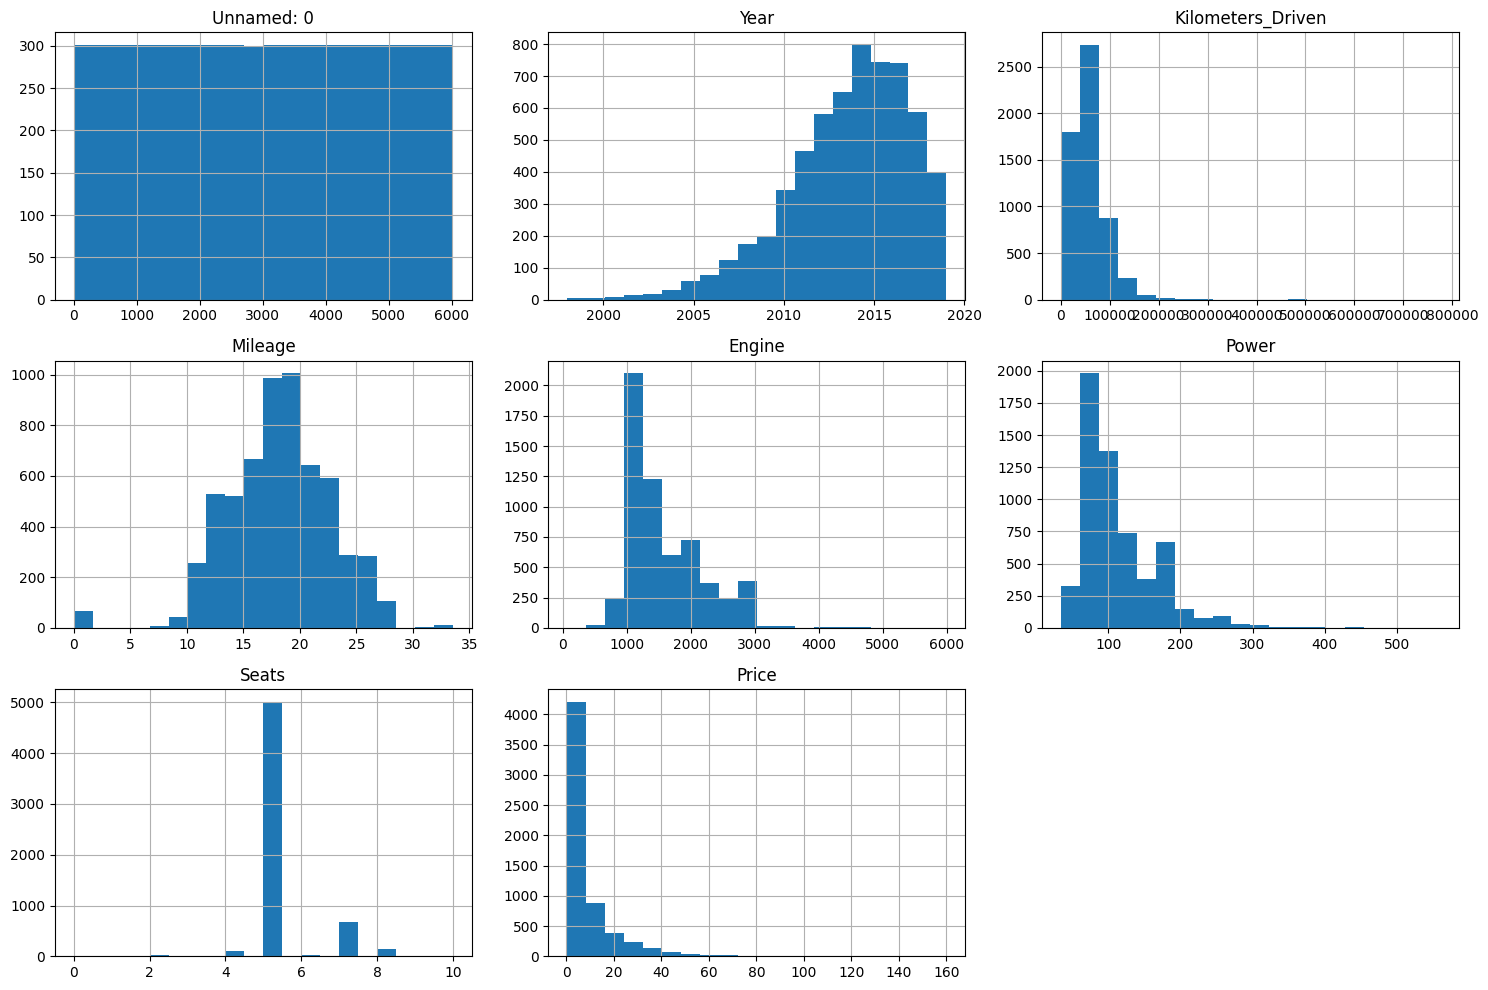

In [48]:
# Visualisasi Distribusi Data dengan Histogram
print("Visualisasi Distribusi Fitur: ")
numeric_col = df.select_dtypes(include=np.number).columns
df[numeric_col].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

Terlihat bahwa kolom Price, Power, dan Kilometers_Driven distribusinya condong ke kanan. Ini menandakan adanya beberapa data ekstrem dengan nilai yang sangat tinggi. Sementara itu, kolom Seats sangat didominasi oleh angka 5, yang berarti mobil 5 kursi adalah yang paling umum di dataset ini

Visualisasi Korelasi Fitur: 


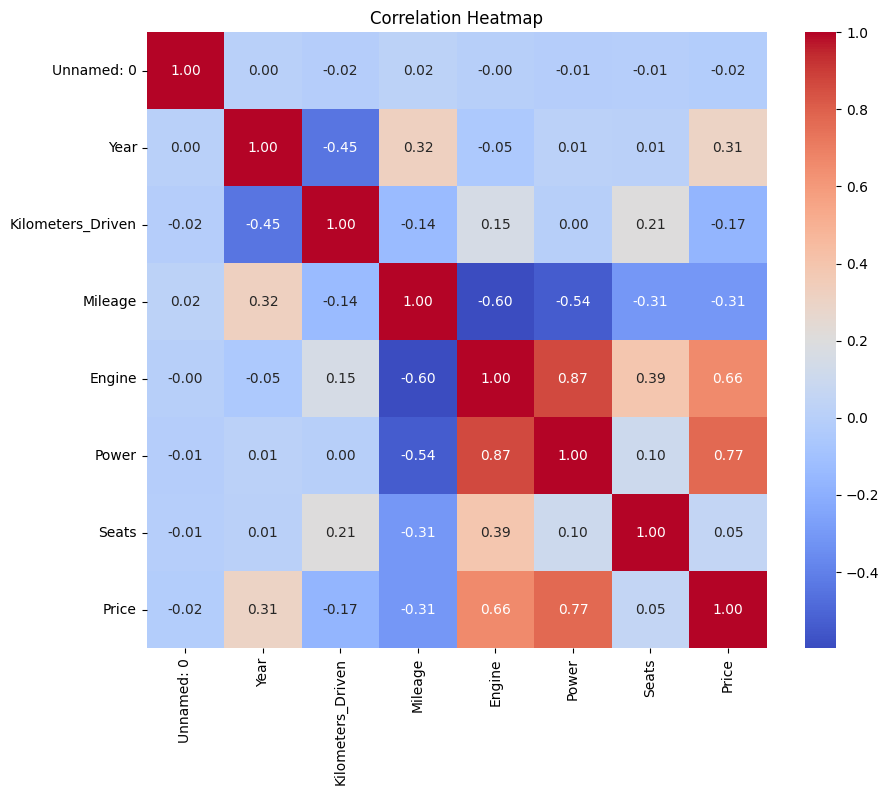

In [49]:
# Visualisasi Korelasi dengan Heatmap
print("Visualisasi Korelasi Fitur: ")
plt.figure(figsize=(10, 8))
# Menghitung korelasi hanya pada kolom numerik
corr = df[numeric_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Ditemukan bahwa Price memiliki korelasi positif terkuat dengan Power (0.77) dan Engine (0.66). Artinya, semakin besar tenaga dan kapasitas mesin, maka harga mobil cenderung semakin tinggi.

## **Data Cleaning**

### **Remove Null Value**

In [50]:
# Buat salinan data untuk proses cleaning
df_clean = df.copy()

# Cek nilai Null pada dataset sebelum dibersihkan
print("Jumlah nilai null SEBELUM dibersihkan:\n", df_clean.isnull().sum())

# Kolom-kolom yang akan diisi nilai null-nya
cols_with_missing = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

# Proses pengisian nilai null dengan rata-rata
for col in cols_with_missing:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

print("\nJumlah nilai null SETELAH dibersihkan:\n", df_clean.isnull().sum())

Jumlah nilai null SEBELUM dibersihkan:
 Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven    300
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

Jumlah nilai null SETELAH dibersihkan:
 Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


### **Remove Duplicate Value**

In [51]:
# Cek duplikasi dataset
duplicate_count = df_clean.duplicated().sum()
print(f"Jumlah data duplikat yang ditemukan: {duplicate_count}")

Jumlah data duplikat yang ditemukan: 0


### **Remove Column ID**

In [52]:
# Menghapus kolom 'Unnamed: 0'
df_clean.drop(['Unnamed: 0'], axis=1, inplace=True)
print("Kolom 'Unnamed: 0' berhasil dihapus.")
print("Kolom saat ini:\n", df_clean.columns)

Kolom 'Unnamed: 0' berhasil dihapus.
Kolom saat ini:
 Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


Kolom Unnamed: 0 dihapus karena merupakan duplikat dari indeks baris dan tidak mengandung informasi yang relevan untuk proses pemodelan.

### **Remove Outliers**

In [53]:
# Buat salinan data khusus untuk proses penghapusan outliers
df_outlier = df_clean.copy()
num_cols = df_outlier.select_dtypes(include=np.number).columns

# Fungsi untuk menghapus outlier
def remove_outliers_iqr(df, columns):
    df_no_outlier = df.copy()
    Q1 = df_no_outlier[columns].quantile(0.25)
    Q3 = df_no_outlier[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter untuk menyimpan data yang BUKAN outlier
    outlier_filters = ~((df_no_outlier[columns] < lower_bound) | (df_no_outlier[columns] > upper_bound)).any(axis=1)
    df_no_outlier = df_no_outlier[outlier_filters]
    return df_no_outlier

# Terapkan fungsi untuk menghapus outlier
df_no_outlier = remove_outliers_iqr(df_outlier, num_cols)

print(f"Jumlah data sebelum hapus outlier: {len(df_outlier)}")
print(f"Jumlah data setelah hapus outlier: {len(df_no_outlier)}")
print(f"Persentase data yang dihapus: {round((len(df_outlier) - len(df_no_outlier)) / len(df_outlier) * 100, 2)}%")

Jumlah data sebelum hapus outlier: 6019
Jumlah data setelah hapus outlier: 4265
Persentase data yang dihapus: 29.14%


## **Feature Selection**

### **Variance Threshold (Filter Method)**

In [54]:
# Ambil hanya kolom numerik dari df_clean
df_numeric = df_clean.select_dtypes(include=['int64', 'float64'])

# Inisialisasi VarianceThreshold dengan ambang batas 0.1
var_thr = VarianceThreshold(threshold=0.1)
var_thr.fit(df_numeric)

# Dapatkan nama kolom yang memiliki varians tinggi
high_variance_cols = df_numeric.columns[var_thr.get_support()]

print("Kolom-kolom dengan varians di atas 0.1:\n", high_variance_cols.tolist())

Kolom-kolom dengan varians di atas 0.1:
 ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


## **Modelling**

### **Encode & Scaling**

In [55]:
df_final = df_clean.copy()

# Pisahkan fitur (X) dan target (y)
X = df_final.drop('Price', axis=1)
y = df_final['Price']

# Mengubah fitur kategorikal menjadi angka
categorical_cols = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scaling menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset ke data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data siap untuk modelling.")
print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")

Data siap untuk modelling.
Ukuran data latih (X_train): (4815, 11)
Ukuran data uji (X_test): (1204, 11)


Pertumbuhan populasi memerlukan beberapa langkah penting dalam persiapan data sebelum dilatih oleh model:

- Pemisahan Fitur dan Target: Data dibagi menjadi variabel independen (X) dan variabel dependen (y).
- Label Encoding: Mengubah nilai kategorikal (teks) menjadi representasi numerik.
- Feature Scaling: Menyamakan skala nilai pada semua fitur menggunakan StandardScaler.
- Train-Test Split: Membagi dataset menjadi data latih dan data uji.


In [56]:
# Membuat dan melatih model Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

print("Model berhasil dilatih!")
print(f"Intercept (titik potong): {model_lr.intercept_}")
# print(f"Coefficient (kemiringan): {model_lr.coef_}")

Model berhasil dilatih!
Intercept (titik potong): 9.500834029011799


### **Model Evaluation**

In [57]:
# Prediksi pada data uji
y_pred_test = model_lr.predict(X_test)

# Membuat dataframe untuk membandingkan nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Harga Aktual': y_test, 'Harga Prediksi': y_pred_test})
comparison_df = comparison_df.reset_index(drop=True)

print("--- Perbandingan Hasil Aktual vs Prediksi (5 Data Pertama) ---")
print(comparison_df.head())

--- Perbandingan Hasil Aktual vs Prediksi (5 Data Pertama) ---
   Harga Aktual  Harga Prediksi
0          5.75        3.674317
1         10.08       13.717158
2          7.85       12.949941
3          2.40        5.033328
4          1.60        4.954000


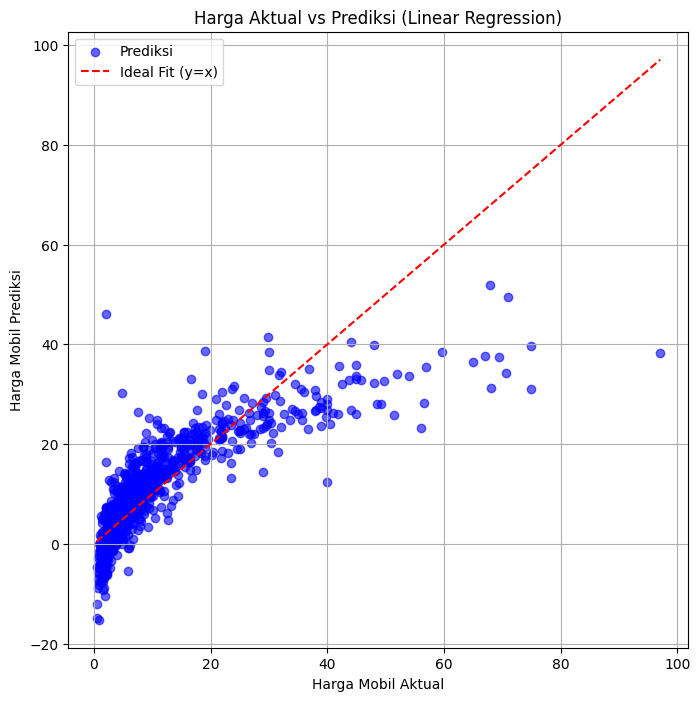

In [58]:
# Membuat scatter plot untuk membandingkan nilai aktual dan prediksi
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue', label='Prediksi')

# Membuat garis ideal (y=x) untuk referensi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Menambahkan judul dan label
plt.title('Harga Aktual vs Prediksi (Linear Regression)')
plt.xlabel('Harga Mobil Aktual')
plt.ylabel('Harga Mobil Prediksi')
plt.legend()
plt.grid(True)
plt.show()

Grafik ini berfungsi untuk memvisualisasikan perbandingan antara harga mobil aktual dengan harga yang diprediksi oleh model dalam bentuk scatter plot.

- Titik biru (plt.scatter) merepresentasikan setiap mobil, dengan posisi horizontal (x) menunjukkan harga aktual dan posisi vertikal (y) menunjukkan harga prediksi.

- Garis putus-putus merah (plt.plot) adalah garis ideal di mana harga aktual sama dengan harga prediksi